In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [3]:
X = pd.DataFrame(df.iloc[:, 3:13].values)
y = df.iloc[:, 13].values
X.head()

,0,1,2,3,4,5,6,7,8,9
0,619,France,Female,42,2,0,1,1,1,101349
1,608,Spain,Female,41,1,83807.9,1,0,1,112543
2,502,France,Female,42,8,159661,3,1,0,113932
3,699,France,Female,39,1,0,2,0,0,93826.6
4,850,Spain,Female,43,2,125511,1,1,1,79084.1


In [4]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [5]:
df.shape

(10000, 14)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_2 = LabelEncoder()
X.loc[:, 2] = labelencoder_X_2.fit_transform(X.iloc[:, 2])
X.loc[:, 1] = labelencoder_X_2.fit_transform(X.iloc[:, 1])

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,619,0,0,42,2,0,1,1,1,101349
1,608,2,0,41,1,83807.9,1,0,1,112543
2,502,0,0,42,8,159661,3,1,0,113932
3,699,0,0,39,1,0,2,0,0,93826.6
4,850,2,0,43,2,125511,1,1,1,79084.1


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10000 non-null  object
 1   1       10000 non-null  int64 
 2   2       10000 non-null  int64 
 3   3       10000 non-null  object
 4   4       10000 non-null  object
 5   5       10000 non-null  object
 6   6       10000 non-null  object
 7   7       10000 non-null  object
 8   8       10000 non-null  object
 9   9       10000 non-null  object
dtypes: int64(2), object(8)
memory usage: 781.4+ KB


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [15]:
classifier = Sequential()
classifier.add(Dense(6, activation = 'relu', input_dim = 10))
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dense( 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
classifier.layers

In [17]:
classifier.inputs

[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_input')>]

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [19]:
classifier.fit(X_train, y_train,batch_size = 10,epochs=100)

Epoch 1/100
800/800 [==============================] - 15s 1ms/step - loss: 0.5493 - accuracy: 0.7507
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4533 - accuracy: 0.8033
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4304 - accuracy: 0.8120
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3984 - accuracy: 0.8353
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3772 - accuracy: 0.8452
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3609 - accuracy: 0.8529
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3653 - accuracy: 0.8531
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3576 - accuracy: 0.8551
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3600 - accuracy: 0.8497
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3520 - accur

In [20]:
y_pred = classifier.predict(X_test)
y_pred

array([[0.07277179],
       [0.5356277 ],
       [0.14062348],
       ...,
       [0.01386392],
       [0.03106117],
       [0.5663754 ]], dtype=float32)

In [22]:
y_pred = (y_pred > 0.5)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1493   71]
 [ 212  224]]


0.8585

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred,average='micro'))
print('Recall:',recall_score(y_test,y_pred,average='micro'))

accuracy: 0.8585
Precision: 0.8585
Recall: 0.8585


          Predicted 0  Predicted 1
Actual 0         1493          212
Actual 1           71          224
              precision    recall  f1-score   support

           0      0.876     0.955     0.913      1564
           1      0.759     0.514     0.613       436

    accuracy                          0.859      2000
   macro avg      0.817     0.734     0.763      2000
weighted avg      0.850     0.859     0.848      2000



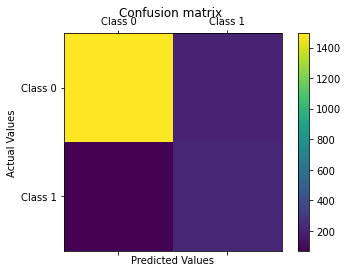

In [25]:
cm=confusion_matrix(y_pred,y_test)
report=classification_report(y_test, y_pred, digits=3)

cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
print(cm_df)
print(report)
    
import matplotlib.pyplot as plt
labels =['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix ')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
def logsitic_reg(df):
    regr_model=LogisticRegression()
    #x_train,x_test,y_train,y_test=np.array()
    x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1:].values,test_size=0.2,random_state=6)
    print('features',df.columns[:-1],'\n')
    print("Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train\t: ",df.shape,x_train.shape, x_test.shape,y_train.shape,y_test.shape)

    regr_model.fit(x_train, y_train)
    y_predict = regr_model.predict(x_test)
    
    acc = accuracy_score(y_predict,y_test)
    cm=confusion_matrix(y_predict,y_test)
    report=classification_report(y_test, y_predict, digits=3)

    
    
    print('accuracy:',acc)
    print(cm)
    print(report)  

In [27]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df1 = df.iloc[:,3:]

In [29]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_2 = LabelEncoder()
df1.loc[:, 2] = labelencoder_X_2.fit_transform(df1.iloc[:, 2])
df1.loc[:, 1] = labelencoder_X_2.fit_transform(df1.iloc[:, 1])

In [31]:
df1.drop(columns=['Gender','Geography'],axis=1,inplace=True)
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,2,1
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,2
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,2


In [32]:
df2_poped=df1.pop('Exited')

In [33]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,2,1
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2


In [34]:
df1.insert(10,'Exited', df2_poped)

In [35]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,2,1,Exited
0,619,42,2,0.00,1,1,1,101348.88,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [36]:
logsitic_reg(df1)

features Index([    'CreditScore',             'Age',          'Tenure',
               'Balance',   'NumOfProducts',       'HasCrCard',
        'IsActiveMember', 'EstimatedSalary',                 2,
                       1],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (10000, 11) (8000, 10) (2000, 10) (8000, 1) (2000, 1)
accuracy: 0.791
[[1556  380]
 [  38   26]]
              precision    recall  f1-score   support

           0      0.804     0.976     0.882      1594
           1      0.406     0.064     0.111       406

    accuracy                          0.791      2000
   macro avg      0.605     0.520     0.496      2000
weighted avg      0.723     0.791     0.725      2000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
# Spot Check Algorithms

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

x_train,x_test,y_train,y_test=train_test_split(df1.iloc[:,:-1].values,df1.iloc[:,-1:].values,test_size=0.2,random_state=6)
models = []

models.append(('LR-sag', LogisticRegression(solver='sag', multi_class='ovr',max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train.ravel(), cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR-sag: 0.796125 (0.000375)
LDA: 0.803250 (0.012160)
KNN: 0.762750 (0.008400)
CART: 0.785125 (0.016379)
NB: 0.782125 (0.009101)
SVM: 0.796125 (0.000375)
